# **[Analytics at Wharton](https://analytics.wharton.upenn.edu/): GPT 4 Computer Vision Notebook**

## **Notebook Creator:** [Jaden Dicopoulos](https://www.linkedin.com/in/jaden-dicopoulos/)

### [**link to live Notebook**](https://colab.research.google.com/drive/1-NLd8t9ve_7kXJVSWJ9gUkLS3qiEOw12?usp=sharing)

In this Notebook you will learn how to use the [GPT 4 Vision model](https://platform.openai.com/docs/guides/vision) API to perform Computer Vision tasks.

In [ ]:
# download the OpenAI Package
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00


In [ ]:
# import relevant libraries
from openai import OpenAI
from IPython.display import Image
import base64

--2024-03-11 18:26:33--  https://www.dropbox.com/scl/fi/kybqtidkjghjz9m9rmuqq/dog.jpg?rlkey=6ag9tnkqxnu0abfulskdvcmaw
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8ff6b4529cef23af0ce6f1644a.dl.dropboxusercontent.com/cd/0/inline/CO79xMxOQiixW2m2T6fOJ5bOrwjaLrg88m-SGXEHLksPOVjx6X-qcE9PRIxGKvz5_-Y4swimYErnkxmhtKQYv-ME1RX-jjdxqE9vpKCIXgFpE4RqmM3aE_zK-si-AnUfexjzwM6RcIz9FBcSe_Vp_Krs/file# [following]
--2024-03-11 18:26:35--  https://uc8ff6b4529cef23af0ce6f1644a.dl.dropboxusercontent.com/cd/0/inline/CO79xMxOQiixW2m2T6fOJ5bOrwjaLrg88m-SGXEHLksPOVjx6X-qcE9PRIxGKvz5_-Y4swimYErnkxmhtKQYv-ME1RX-jjdxqE9vpKCIXgFpE4RqmM3aE_zK-si-AnUfexjzwM6RcIz9FBcSe_Vp_Krs/file
Resolving uc8ff6b4529cef23af0ce6f1644a.dl.dropboxusercontent.com (uc8ff6b4529cef23af0ce6f1644a.dl.dropboxusercontent.com)... 162.125.4.15, 2620:100:

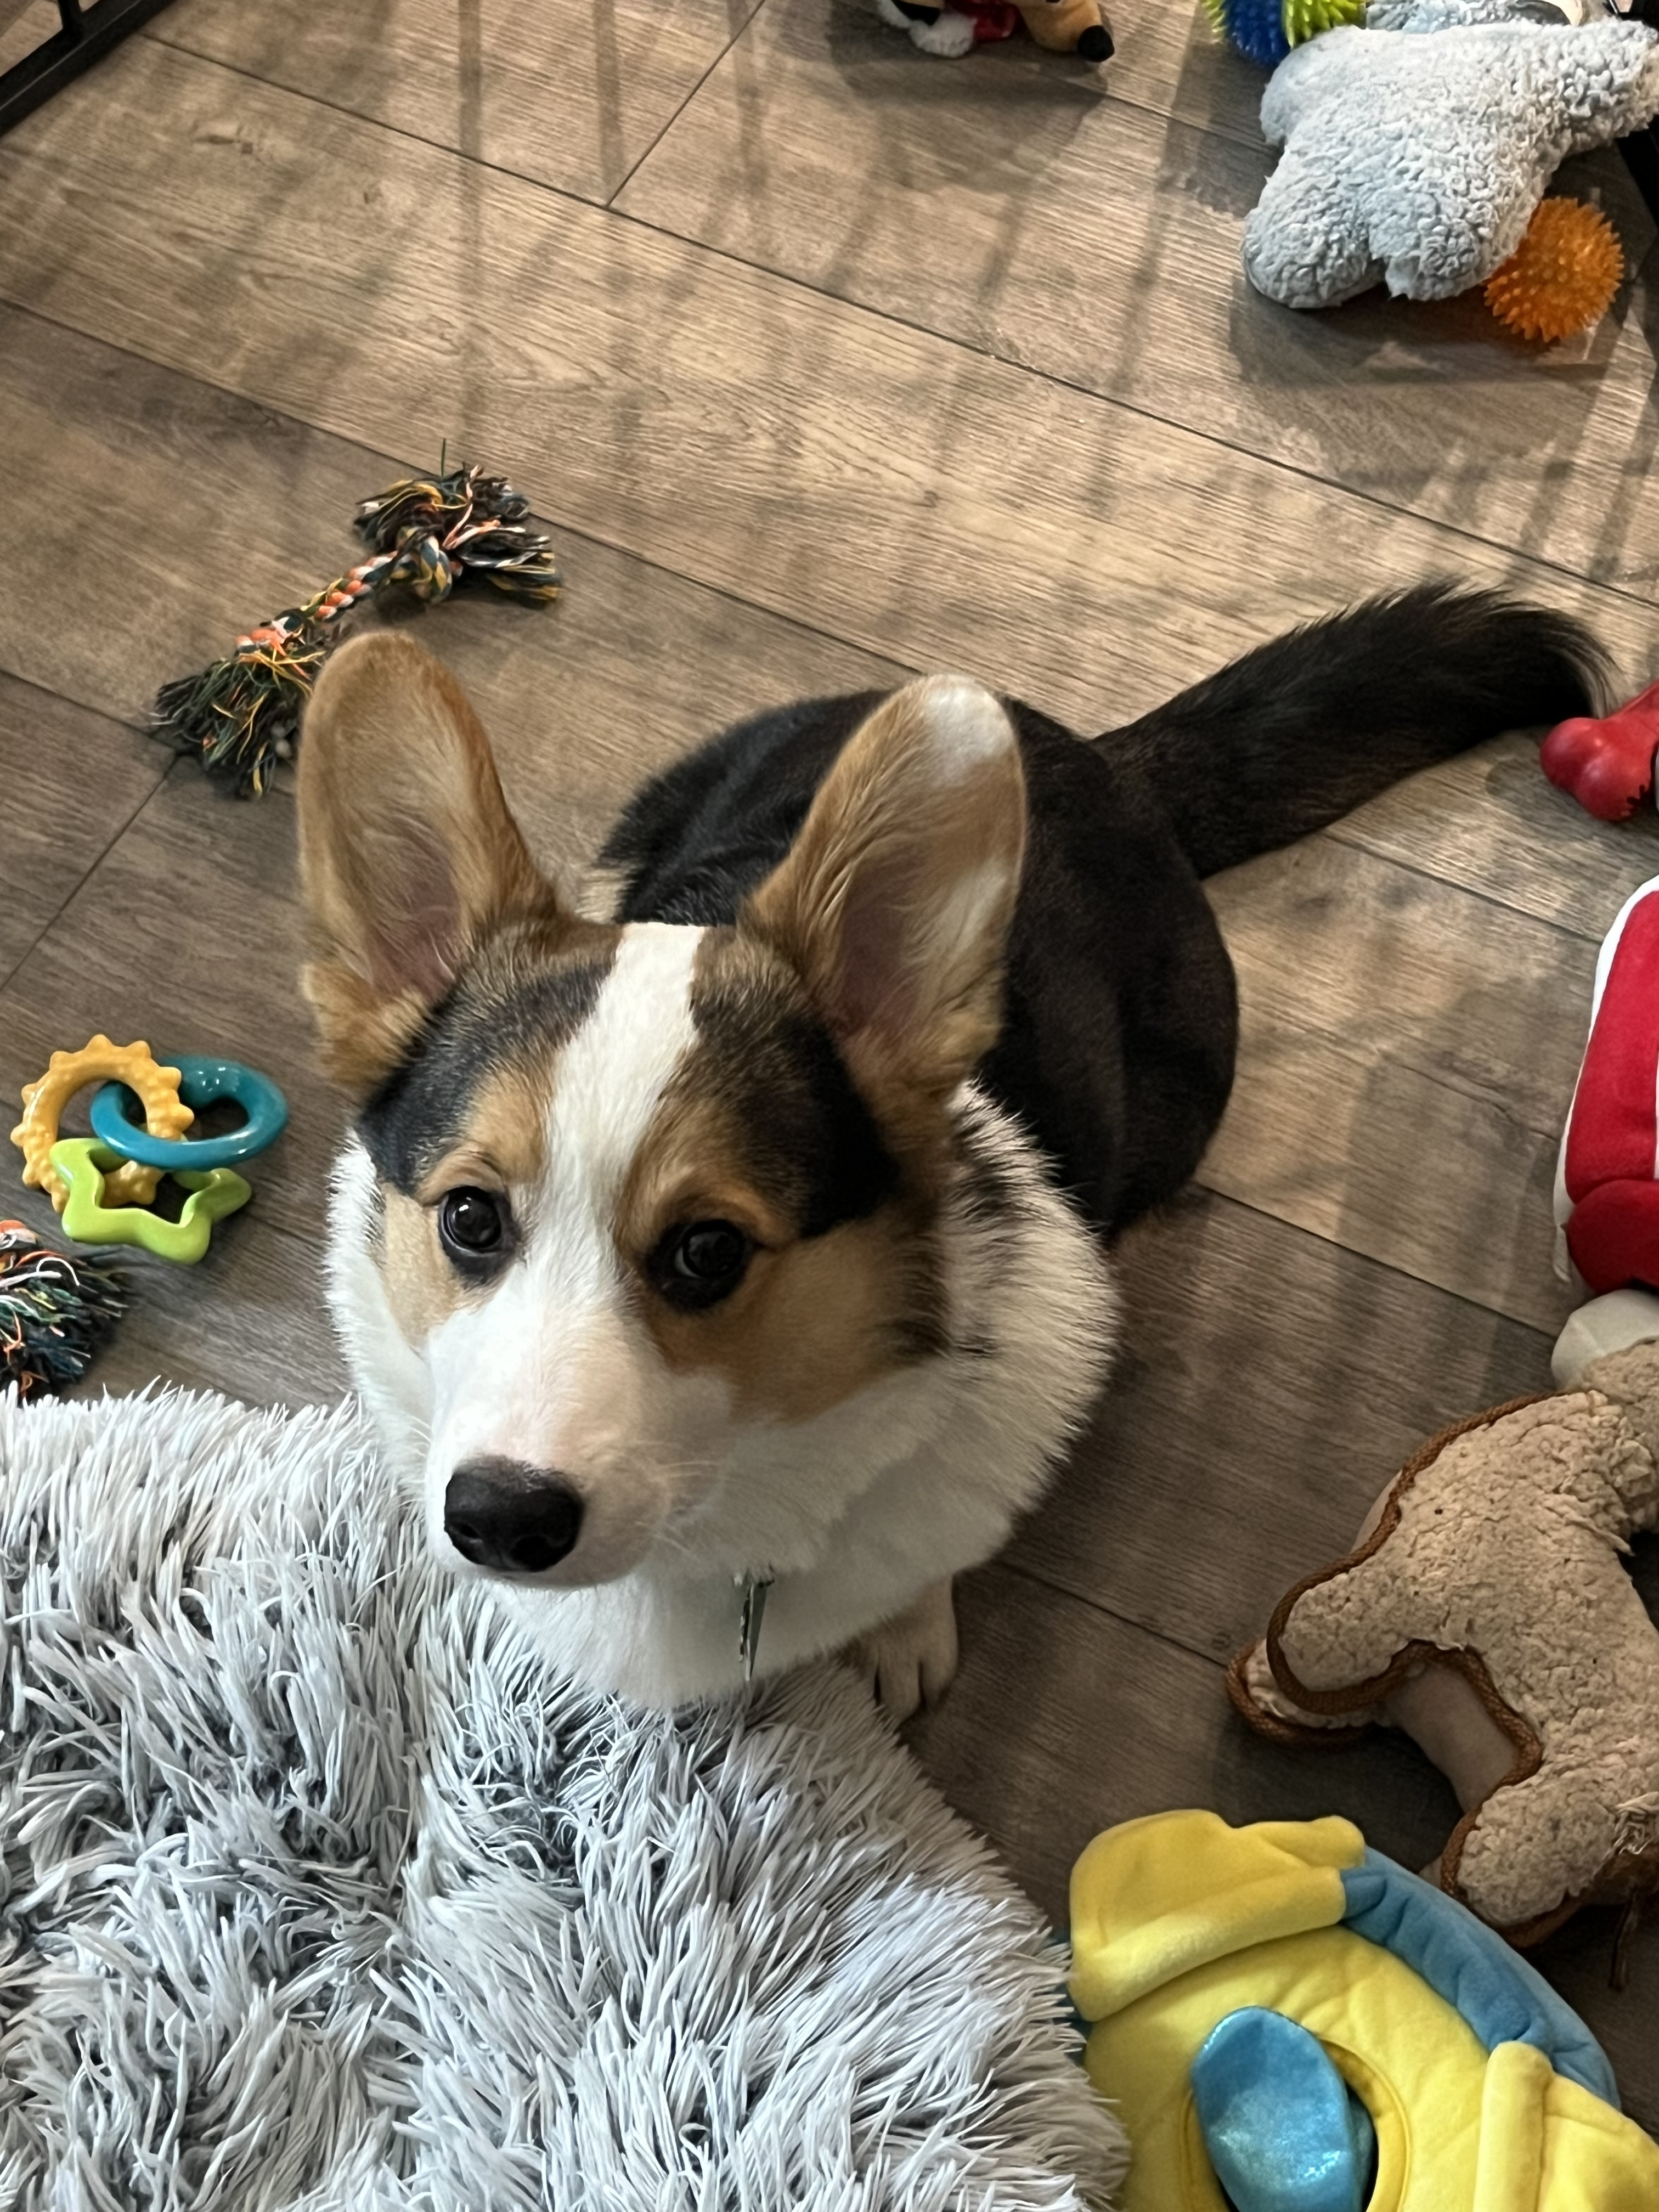

In [7]:
# download the image or use you own
# the image we will be using for this demo is stored on dropbox:
!wget -O dog.jpg https://www.dropbox.com/scl/fi/kybqtidkjghjz9m9rmuqq/dog.jpg?rlkey=6ag9tnkqxnu0abfulskdvcmaw&e=1&dl=0

Image("dog.jpg")

In [8]:
# Load and encode the image
image = "dog.jpg"

# This reads the image and translates it into a manner that the model can understand.
with open(image, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

In [9]:
# Contstruct the prompt, this is split into two forms incase you want to run a loop with different pretext.
context = 'Explain the image as best you can.'
prompt_message = f"Context {context}. Then determine if the image fits into one of these taxonomies, Health, Pets, Sports, Travel, or Technology."

# This is the structure of the prompt message and how to upload images to the model
PROMPT_MESSAGES = {
        "role": "user",
        "content": [
            prompt_message,
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encoded_string}"}}
        ],
    }

In [10]:
# Other model parameters that are needed.
params = {
        "model": "gpt-4-vision-preview",
        "messages": [PROMPT_MESSAGES],
        "max_tokens": 500,
    }

In [11]:
# Set your API key and prompt the model

# Access your secret OpenAI API key that you have saved in your Google Colab user profile on the left tab labelled "secrets" with this line.
from google.colab import userdata

# Set your API key
client = OpenAI(
    #userdata.get('OpenAIKey') is the function to get your OpenAI API key from Google Colab
    api_key = userdata.get('OpenAIKey'),
)

In [13]:
# Create a variable for your result to be stored and print it
result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

The image shows a medium-to-close-up view of a dog, specifically a Pembroke Welsh Corgi, situated on a wooden floor surrounded by various dog toys. The corgi has distinctive markings with a white, black, and brown coat. The dog's ears are perked up, and it is gazing directly at the camera with a focused and alert expression. The toys around the corgi include a rope toy, a plush toy, and other chewable toys that are typically used for play and stimulation.

This image best fits into the "Pets" taxonomy because it prominently features a pet dog in a domestic setting and includes pet-related items (toys). The picture may also interest people who appreciate pet care, animals, and discussions about domestic pets and their environments.
